In [179]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math

td=pd.read_csv("train.csv")

In [180]:
td.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [181]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [182]:
td.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [183]:

a = td[td["Survived"] == 1]
a1 = a[a["Pclass"] == 1]
print(a1['Age'].median()) 

b = td[td["Survived"] == 0]
b1 = b[b["Pclass"] == 1]
print(b1['Age'].median())

c = td[td["Survived"] == 1]
c1 = c[c["Pclass"] == 2]
print(c1['Age'].median())

d = td[td["Survived"] == 0]
d1 = d[d["Pclass"] == 2]
print(d1['Age'].median())

e = td[td["Survived"] == 1]
e1 = e[e["Pclass"] == 3]
print(e1['Age'].median())

f = td[td["Survived"] == 0]
f1 = f[f["Pclass"] == 3]
print(f1['Age'].median())


a = td[td["Survived"] == 1]
a1 = a[a["Pclass"] == 1]
print(a1['Embarked'].mode()[0])  

b = td[td["Survived"] == 0]
b1 = b[b["Pclass"] == 1]
print(b1['Embarked'].mode()[0])

c = td[td["Survived"] == 1]
c1 = c[c["Pclass"] == 2]
print(c1['Embarked'].mode()[0])

d = td[td["Survived"] == 0]
d1 = d[d["Pclass"] == 2]
print(d1['Embarked'].mode()[0])

e = td[td["Survived"] == 1]
e1 = e[e["Pclass"] == 3]
print(e1['Embarked'].mode()[0])

f = td[td["Survived"] == 0]
f1 = f[f["Pclass"] == 3]
print(f1['Embarked'].mode()[0])


35.0
45.25
28.0
30.5
22.0
25.0
S
S
S
S
S
S


In [184]:
td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(35.0)
td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(28.0)
td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(22.0)

td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(45.25)
td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(30.5)
td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Age"].isna()) , "Age"] = td["Age"].fillna(25.0)

td.loc[(td["Survived"] == 1) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("B96")
td.loc[(td["Survived"] == 1) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E101")
td.loc[(td["Survived"] == 1) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("E121")

td.loc[(td["Survived"] == 0) & (td["Pclass"]==1)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("C124")
td.loc[(td["Survived"] == 0) & (td["Pclass"]==2)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("D")
td.loc[(td["Survived"] == 0) & (td["Pclass"]==3)&(td["Cabin"].isna()) , "Cabin"] = td["Cabin"].fillna("F")
td.Embarked.fillna("S")

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [185]:
# td['FamilySize'] = td['SibSp'] + td['Parch'] + 1

# 1.Total No.of Passangers:891

# 2.columns/ filds:12

<AxesSubplot:xlabel='Survived', ylabel='count'>

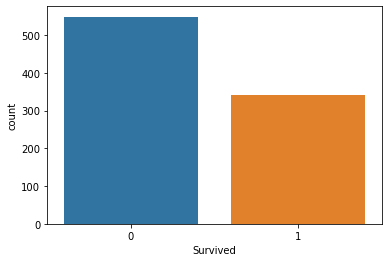

In [186]:
sb.countplot(x="Survived",data=td)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

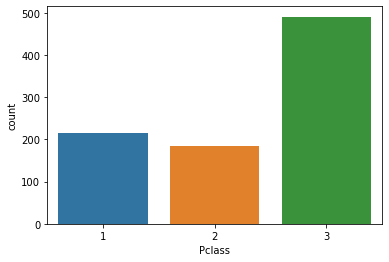

In [187]:
sb.countplot(x="Pclass", data=td)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

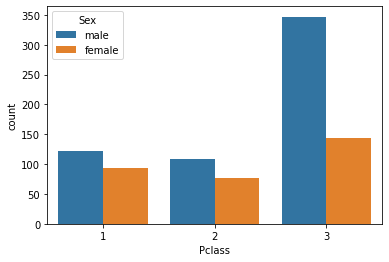

In [188]:
sb.countplot(x="Pclass", hue="Sex",data=td)

<AxesSubplot:xlabel='Survived', ylabel='count'>

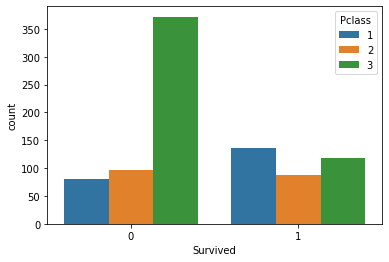

In [189]:
sb.countplot(x="Survived", hue="Pclass",data=td)

<AxesSubplot:xlabel='Survived', ylabel='count'>

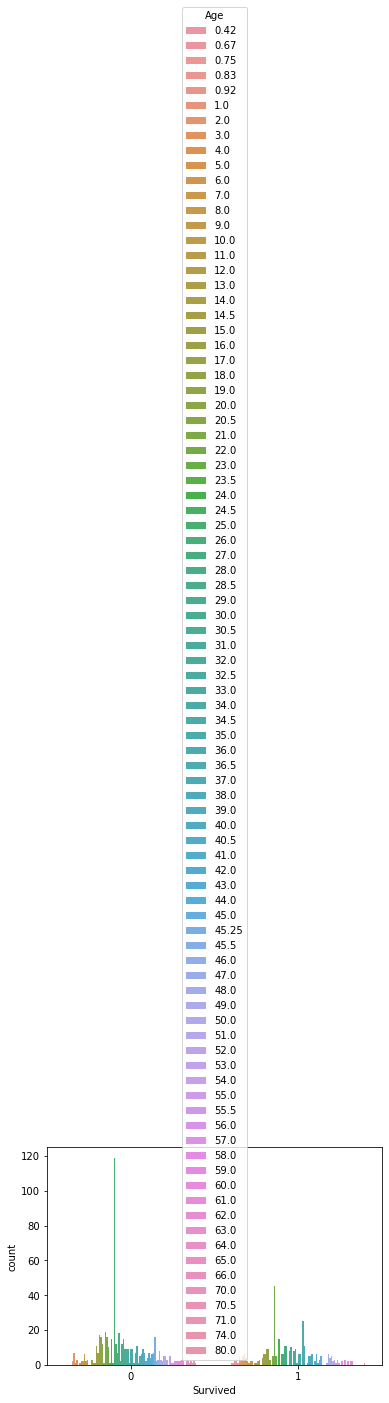

In [190]:
sb.countplot(x="Survived", hue="Age",data=td)

In [191]:
td.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [192]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [193]:
td.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [194]:
td.dropna(inplace=True)

In [195]:
td.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [196]:
td.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  889 non-null    bool 
 1   Survived     889 non-null    bool 
 2   Pclass       889 non-null    bool 
 3   Name         889 non-null    bool 
 4   Sex          889 non-null    bool 
 5   Age          889 non-null    bool 
 6   SibSp        889 non-null    bool 
 7   Parch        889 non-null    bool 
 8   Ticket       889 non-null    bool 
 9   Fare         889 non-null    bool 
 10  Cabin        889 non-null    bool 
 11  Embarked     889 non-null    bool 
dtypes: bool(12)
memory usage: 17.4 KB


In [197]:
print(td['Sex'])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 889, dtype: object


In [198]:
sex=pd.get_dummies(td['Sex'])

In [199]:
print(sex)

     female  male
0         0     1
1         1     0
2         1     0
3         1     0
4         0     1
..      ...   ...
886       0     1
887       1     0
888       1     0
889       0     1
890       0     1

[889 rows x 2 columns]


In [200]:
print(td['Embarked'])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object


In [201]:
emb=pd.get_dummies(td['Embarked'])

In [202]:
print(emb)

     C  Q  S
0    0  0  1
1    1  0  0
2    0  0  1
3    0  0  1
4    0  0  1
..  .. .. ..
886  0  0  1
887  0  0  1
888  0  0  1
889  1  0  0
890  0  1  0

[889 rows x 3 columns]


In [203]:
print(td['Pclass'])

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64


In [204]:
pcls=pd.get_dummies(td['Pclass'],prefix="Pclass")

In [205]:
print(pcls)

     Pclass_1  Pclass_2  Pclass_3
0           0         0         1
1           1         0         0
2           0         0         1
3           1         0         0
4           0         0         1
..        ...       ...       ...
886         0         1         0
887         1         0         0
888         0         0         1
889         1         0         0
890         0         0         1

[889 rows x 3 columns]


In [206]:
print(td.Cabin)

0         F
1       C85
2      E121
3      C123
4         F
       ... 
886       D
887     B42
888       F
889    C148
890       F
Name: Cabin, Length: 889, dtype: object


In [207]:
cab=pd.get_dummies(td['Cabin'],prefix="Cabin")
print(cab)

     Cabin_A10  Cabin_A14  Cabin_A16  Cabin_A19  Cabin_A20  Cabin_A23  \
0            0          0          0          0          0          0   
1            0          0          0          0          0          0   
2            0          0          0          0          0          0   
3            0          0          0          0          0          0   
4            0          0          0          0          0          0   
..         ...        ...        ...        ...        ...        ...   
886          0          0          0          0          0          0   
887          0          0          0          0          0          0   
888          0          0          0          0          0          0   
889          0          0          0          0          0          0   
890          0          0          0          0          0          0   

     Cabin_A24  Cabin_A26  Cabin_A31  Cabin_A32  ...  Cabin_F  Cabin_F E69  \
0            0          0          0         

In [208]:
td.drop(["Pclass","Sex","Embarked"],axis=1,inplace=True)

In [209]:
td=pd.concat([td,sex,emb,pcls,cab],axis=1)

In [210]:
print(td.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Columns: 165 entries, PassengerId to Cabin_T
dtypes: float64(2), int64(4), object(3), uint8(156)
memory usage: 204.9+ KB
None


In [211]:
td.drop(["Name","PassengerId","Ticket","Cabin"],axis=1,inplace=True)

In [212]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Columns: 161 entries, Survived to Cabin_T
dtypes: float64(2), int64(3), uint8(156)
memory usage: 177.1 KB


In [213]:
td["Age-D"]=td["Age"]

In [214]:
td["SibSp-D"]=td["SibSp"]

In [239]:
td.corr()

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Age-D,SibSp-D
Survived,1.000000,-0.078590,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777,...,-0.026409,-0.037369,0.034030,0.073942,-0.026409,0.060339,0.016261,-0.026409,-0.078590,-0.034040
Age,-0.078590,1.000000,-0.243228,-0.172950,0.121731,-0.101366,0.101366,0.043610,-0.088744,0.017654,...,0.032301,-0.025609,-0.067067,-0.000795,-0.010538,-0.095141,-0.072859,0.039861,1.000000,-0.243228
SibSp,-0.034040,-0.243228,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438,...,-0.015947,-0.022565,0.007516,-0.027652,-0.015947,0.063530,-0.001474,-0.015947,-0.243228,1.000000
Parch,0.083151,-0.172950,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512,...,-0.015917,-0.022523,0.068623,-0.027601,-0.015917,0.036368,0.072335,-0.015917,-0.172950,0.414542
Fare,0.255290,0.121731,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758,...,-0.016517,-0.023371,-0.007142,-0.024325,-0.016449,0.006600,-0.025061,0.002299,0.121731,0.160887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cabin_F4,0.060339,-0.095141,0.063530,0.036368,0.006600,0.014829,-0.014829,-0.022921,-0.014622,0.029288,...,-0.001593,-0.002255,-0.002763,-0.002763,-0.001593,1.000000,-0.003192,-0.001593,-0.095141,0.063530
Cabin_G6,0.016261,-0.072859,-0.001474,0.072335,-0.025061,0.091426,-0.091426,-0.032452,-0.020703,0.041467,...,-0.002256,-0.003192,-0.003912,-0.003912,-0.002256,-0.003192,1.000000,-0.002256,-0.072859,-0.001474
Cabin_T,-0.026409,0.039861,-0.015947,-0.015917,0.002299,-0.024676,0.024676,-0.016199,-0.010334,0.020698,...,-0.001126,-0.001593,-0.001953,-0.001953,-0.001126,-0.001593,-0.002256,1.000000,0.039861,-0.015947
Age-D,-0.078590,1.000000,-0.243228,-0.172950,0.121731,-0.101366,0.101366,0.043610,-0.088744,0.017654,...,0.032301,-0.025609,-0.067067,-0.000795,-0.010538,-0.095141,-0.072859,0.039861,1.000000,-0.243228


<AxesSubplot:>

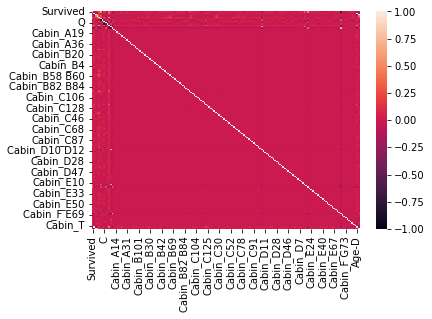

In [243]:
import seaborn as sns
sns.heatmap(td.corr())

In [215]:
td.head(5)

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Age-D,SibSp-D
0,0,22.0,1,0,7.2500,0,1,0,0,1,...,0,0,0,0,0,0,0,0,22.0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,...,0,0,0,0,0,0,0,0,38.0,1
2,1,26.0,0,0,7.9250,1,0,0,0,1,...,0,0,0,0,0,0,0,0,26.0,0
3,1,35.0,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,35.0,1
4,0,35.0,0,0,8.0500,0,1,0,0,1,...,0,0,0,0,0,0,0,0,35.0,0


In [216]:
X=td.drop(["Survived"],axis=1)

In [217]:
print(X)

      Age  SibSp  Parch     Fare  female  male  C  Q  S  Pclass_1  ...  \
0    22.0      1      0   7.2500       0     1  0  0  1         0  ...   
1    38.0      1      0  71.2833       1     0  1  0  0         1  ...   
2    26.0      0      0   7.9250       1     0  0  0  1         0  ...   
3    35.0      1      0  53.1000       1     0  0  0  1         1  ...   
4    35.0      0      0   8.0500       0     1  0  0  1         0  ...   
..    ...    ...    ...      ...     ...   ... .. .. ..       ...  ...   
886  27.0      0      0  13.0000       0     1  0  0  1         0  ...   
887  19.0      0      0  30.0000       1     0  0  0  1         1  ...   
888  25.0      1      2  23.4500       1     0  0  0  1         0  ...   
889  26.0      0      0  30.0000       0     1  1  0  0         1  ...   
890  32.0      0      0   7.7500       0     1  0  1  0         0  ...   

     Cabin_F G63  Cabin_F G73  Cabin_F2  Cabin_F33  Cabin_F38  Cabin_F4  \
0              0            0       

In [218]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Columns: 162 entries, Age to SibSp-D
dtypes: float64(3), int64(3), uint8(156)
memory usage: 184.1 KB


In [219]:
y=td["Survived"]

In [220]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [221]:
from sklearn.model_selection import train_test_split

In [222]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [223]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 666 entries, 747 to 37
Columns: 162 entries, Age to SibSp-D
dtypes: float64(3), int64(3), uint8(156)
memory usage: 137.9 KB


In [224]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 387 to 292
Columns: 162 entries, Age to SibSp-D
dtypes: float64(3), int64(3), uint8(156)
memory usage: 46.2 KB


In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
lm=LogisticRegression(max_iter=10000)

In [227]:
print(lm.fit(X_train,y_train))

LogisticRegression(max_iter=10000)


In [228]:
Predections=lm.predict(X_test)

In [229]:
from sklearn.metrics import classification_report

In [230]:
print(classification_report(y_test,Predections))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       138
           1       0.97      0.98      0.97        85

    accuracy                           0.98       223
   macro avg       0.98      0.98      0.98       223
weighted avg       0.98      0.98      0.98       223



In [231]:
from sklearn.metrics import confusion_matrix

In [232]:
print(confusion_matrix(y_test,Predections))

[[135   3]
 [  2  83]]


In [233]:
from sklearn.metrics import accuracy_score

In [234]:
print(accuracy_score(y_test,Predections))

0.9775784753363229


In [235]:
#import pickle

In [236]:
# save the model to disk
#with open('Titanic','wb') as f:
#   pickle.dump(td,f)


In [237]:
Predections

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)